# Coursera Machine Learning

## Week 1: Introduction to Machine Learning

### What is Machine Learning?

Definition:

*"Field of study that gives computers the ability to learn without being 
explicitly programmed."* - Arthur Samuel (1959)

There are two main types of machine learning:
* Supervised learning.
* Unsupervised learning.

### Supervised Learning

Key characteristics:
* The aim is to map an input, $x$, to an output, $y$.
* You give your learning algorithm examples to learn from.
* The learning algorithm then learns to predict an output from an input.

Two main types of supervised learning:
* **Regression**: Fitting a curve to data, mapping inputs to outputs.
* **Classification**: Deciding what category something belongs to based on a set
of inputs.


Regression examples:
* Spam filtering.
* Audio to text transcripts (speech recognition).
* Language translation.
* (advertisement, user info) -> will a user click (0, 1).
* visual inspection.

Classification examples:
* Tumour identification.

### Unsupervised Learning

For example, consider we have classification of tumour types based on prior data
on types and classifiers, *e.g.* age and tumour size. In unsupervised learning,
we would not have the prior *"right answers"*; the algorithm would have to spot
patterns by itself - this is known as **clustering**.

Three main types of unsupervised learning:
* **Clustering**
* **Anomaly Detection**
* (TBC)

Clustering examples:
* News aggregation.
* Mapping genes to traits.
* Market segmentation.

### Linear Regression

Linear regression is a basic type of supervised learning where the aim is to fit
a straight lint to some data.
Regression models predict *numbers* (whereas classification models predict
*categories*.) Accordingly, classification models have a finite / countable set
of outputs, whereas regression models can have infinite (continuous) outputs.

The initial "right answers" used to train a linear regression are known as a
**training set**.

Notation:
* $x$: **Input variable** (also known as a **feature**).
* $y$: **Output variable**, also known as a **target variable**.
* $m$: **Number of training examples**.
* $(x, y)$: A single training example.
* $(x^{(i)}, y^{(i)})$: The $i$<sup>th</sup> training example.

To train the model, we feed the training set (inputs and outputs) into your
learning algorithm (*e.g.* linear regression in this case) to create a
**function**, $f$, also known as a **hypothesis**, or a **model**.

The function, $f$, then takes some input, $x$ and gives a **prediction** (or
**estimate**), $\hat{y}$.

Note that a "bare" $y$ refers to the **target** which is the *true value*.

For **univariate linear regression** (linear regression in a single variable):
$$f_{w,b}(x) = wx + b$$
Note that $f_{w,b}(x)$ is often shortened to $f(x)$.

Notation:
* $w$: The **weight** (aka the *slope*).
* $b$: The **bias** (aka the *intercept*, or $y$*-intercept*).
* $\boldsymbol{x}$: A *bold* value denotes a **vector** – *e.g.* all the
$x$-values.
Taken together, $w$ and $b$ are the **parameters** of the model. They may also
be refered to collectively as **coefficients** or **weights**.

Note that $f(x)$ may be more completely written as $f_{w,b}(x^{(i)})$.

For a given input, the prediction is given by:
$$ \hat{y}^{(i)} = f_{w,b}(x^{(i)}) $$
where
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Our aim in linear regression is to find values for $w$ and $b$ so that
$\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $(x^{(i)}, y^{(i)})$.

To do this, we need to introduce a **cost function**, $J$, which measures how
well a line fits the training data. For our parameters, the cost function is,
more specifically, $J(w, b)$.

For a given prediction, the **error** is given by $\hat{y}^{(i)} - y^{(i)}$.

So that we work with positive values, we consider instead the squared error, and
so that we normalize, we consider the mean of this over all training examples.
Thus, our cost function is the **mean squared error**, or **MSE**. Note that we
divide by a factor of $2m$, and not $m$, which is by convention.
$$J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$
Thus:
$$J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})^2$$

Our goal, therefore, is to minimize our cost function, *i.e.*:
$$\underset{w, b}{\text{minimize}}\;J(w,b)$$

Let's take a simpler example, where we assume the intercept is zero, giving:
$$J(w) = \frac{1}{2m}\sum_{i=1}^{m}(f_{(w)}(x^{(i)}) - y^{(i)})^2$$
$$J(w) = \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)} - y^{(i)})^2$$

Suppose we have the following training set:
| $x$ | $y$ |
|----:|----:|
| 1   | 1   |
| 2   | 2   |
| 3   | 3   |

We can plot the values of $J(w)$ as a function of $w$:

Text(0, 0.5, '$J(w)$')

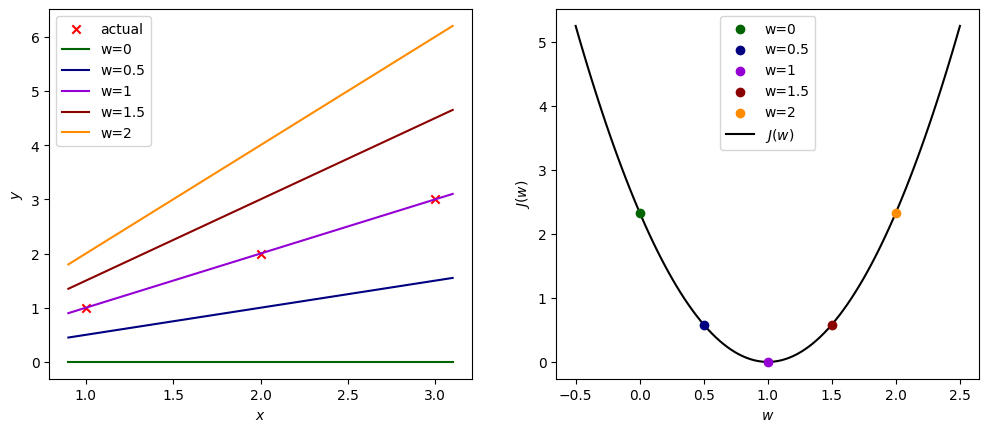

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
m = len(x)

def J_w(x, y, w):
    return (1 / (2 * m)) * np.sum(np.square(x * w - y), axis=0)

def J_w_vectorized(x, y, w_vector):
    x_col = x [:, None] # convert 1D array to 2D column vector
    y_col = y [:, None] # convert 1D array to 2D column vector
    w_row = w_vector[None, :] # convert 1D array to 2D row vector
    return (1 / (2 * m)) * np.sum(np.square(x_col * w_row - y_col), axis=0)

fig, axs = plt.subplots(nrows=1, ncols=2)

# Actual values
axs[0].scatter(x=x, y=y, marker="x", color="r", label="actual")

# Plot lines and J(w) for various values of w
pred_x = np.array(axs[0].get_xlim())
pred_w = {0: "darkgreen", 0.5: "navy", 1: "darkviolet", 1.5: "darkred", 2: "darkorange"}
for w, color in pred_w.items():
    pred_y = w * pred_x
    axs[0].plot(pred_x, pred_y, color=color, label=f"w={w}")
    axs[1].scatter(x=w, y=J_w(x, y, w), marker="o", color=color, label=f"w={w}")

# Plot J(w) as a line
w_n = 100
w_lim = (-0.5, 2.5)
w = np.linspace(*w_lim, w_n)
j_w = J_w_vectorized(x, y, w)
axs[1].plot(w, j_w, color="k", label="$J(w)$", zorder=0)

# Formatting and labels
fig.set_figwidth(12)
axs[0].legend()
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[1].legend()
axs[1].set_xlabel("$w$")
axs[1].set_ylabel("$J(w)$")


For the above example, it is clear that the function $J(w)$ is minimized when $w = 1$.

TODO (remainder of Week 1):
* Implement for $J(w, b)$, as per "visualization examples" / "Optional lab: Cost function"
* Gradient descent.